In [1]:
import torch
import torchaudio
import os
import pandas as pd
from tqdm import tqdm

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
waveform, sample_rate = torchaudio.load('../data/ff1010bird/audio/wav/156147.wav')

In [4]:
waveform.shape

torch.Size([1, 441000])

In [2]:
## install backend audio
## https://stackoverflow.com/questions/62543843/cannot-import-torch-audio-no-audio-backend-is-available

str(torchaudio.get_audio_backend())

'soundfile'

In [1]:
## lets check if the opensource audio of bird and no bird are of same sample rate

In [ ]:
## check warblrb10k_public

In [5]:
train_df = pd.read_csv('../data/warblrb10k_public/warblrb10k_public_metadata_2018.csv')
train_df.head()

,itemid,datasetid,hasbird
0,759808e5-f824-401e-9058,warblrb10k,1
1,1d94fc4a-1c63-4da0-9cac,warblrb10k,1
2,bb0099ce-3073-4613-8557,warblrb10k,1
3,c4c67e81-9aa8-4af4-8eb7,warblrb10k,1
4,ab322d4b-da69-4b06-a065,warblrb10k,0


In [6]:
audio_file = [i for i in os.listdir('../data/warblrb10k_public/audio/wav') if 'ipynb' not in i ]


In [8]:
audio_file[:3]

['000e088a-69f7-4d7a-ba7b.wav',
 '0011e7f9-ec1e-4f3a-a70f.wav',
 '001277e4-24c2-4b8e-a6a8.wav']

In [14]:
sample_rate_list = []
for i in tqdm(train_df['itemid']):
    _, sample_rate = torchaudio.load('../data/warblrb10k_public/audio/wav/'+i+'.wav')
    sample_rate_list.append(sample_rate)
    
train_df['sample_rate'] = sample_rate_list

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [08:15<00:00, 16.14it/s]


In [15]:
train_df['sample_rate'].value_counts()

44100    8000
Name: sample_rate, dtype: int64

In [16]:
train_df = pd.read_csv('../data/ff1010bird/ff1010bird_metadata_2018.csv')
train_df.head()

,itemid,datasetid,hasbird
0,64486,ff1010bird,0
1,2525,ff1010bird,0
2,44981,ff1010bird,0
3,101323,ff1010bird,0
4,165746,ff1010bird,0


In [18]:
sample_rate_list = []
for i in tqdm(train_df['itemid']):
    _, sample_rate = torchaudio.load('../data/ff1010bird/audio/wav/'+str(i)+'.wav')
    sample_rate_list.append(sample_rate)
    
train_df['sample_rate'] = sample_rate_list

100%|██████████████████████████████████████████████████████████████████████████████| 7690/7690 [06:01<00:00, 21.30it/s]


In [19]:
train_df['sample_rate'].value_counts()

44100    7690
Name: sample_rate, dtype: int64

In [ ]:
## Both are using 44100 sample rate

In [20]:
waveform, sample_rate = torchaudio.load('../data/ff1010bird/audio/wav/'+str(i)+'.wav')

In [22]:
print('one second', waveform.shape[1]/10)

one second 44100.0


In [ ]:
waveform

## Melspec diplay

In [32]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import librosa
import torch

In [33]:
waveform, sample_rate = torchaudio.load('../data/ff1010bird/audio/wav/1932.wav')

In [34]:
waveform.shape

torch.Size([1, 441000])

In [35]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(T.AmplitudeToDB()(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

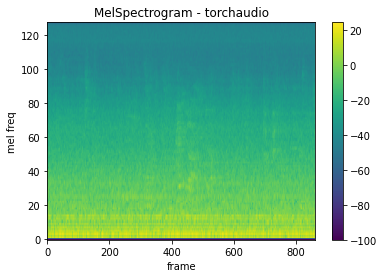

In [36]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(waveform)
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [20]:
db_img = T.AmplitudeToDB()(melspec[0])

In [21]:
print(db_img.shape)
print(db_img.min())
print(db_img.max())

torch.Size([128, 862])
tensor(-100.)
tensor(24.3734)


In [29]:
input_image = torch.stack([db_img,db_img,db_img],dim = -1).unsqueeze(0).permute(0,3,1,2)
input_norm = torch.nn.BatchNorm2d(3)
output = input_norm(input_image)

In [31]:
print(output.shape)
print(output.min())
print(output.max())

torch.Size([1, 3, 128, 862])
tensor(-4.0979, grad_fn=<MinBackward1>)
tensor(2.5093, grad_fn=<MaxBackward1>)
